In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid', {'font.sans-serif':'Laksaman'})

In [58]:
df = pd.read_csv("./datasets_clean/2020Table14_clean.csv")

In [59]:
df.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation,Construction_time
0,ARGENTINA,AR -1,ATUCHA-1,PHWR,PHWR KWU,1179,362,340,NASA,SIEMENS,74.5,75.5,1968-06-01,1974-03-01,1974-06-01 00:00:00,2099
1,ARGENTINA,AR -2,EMBALSE,PHWR,CANDU 6,2064,656,608,NASA,AECL,78.6,78.9,1974-04-01,1983-04-01,1984-01-01 00:00:00,3287
2,ARGENTINA,AR -3,ATUCHA-2,PHWR,PHWR KWU,2160,745,693,NASA,SIEMENS,53.1,53.1,1981-07-01,2014-06-01,2016-05-01 00:00:00,12023
3,ARMENIA,AM -19,ARMENIAN-2,PWR,VVER V-270,1375,451,415,ANPPCJSC,FAEA,65.6,67.7,1975-07-01,1980-01-01,1980-05-01 00:00:00,1645
4,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,0.0,0.0,2013-11-01,2020-11-01,NaN,2557


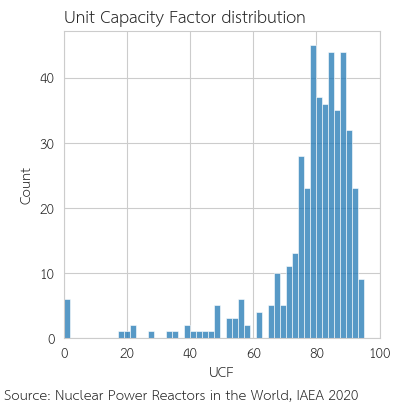

In [114]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(df['UCF'], kde=False, ax=ax, bins=50)
ax.set_title("Unit Capacity Factor distribution", loc='left')
ax.set_xlim(0, 100)

plt.tight_layout()
ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points',)
plt.show()

In [72]:
top10 = df.groupby(['Country'])['Net'].agg('sum').sort_values()[::-1][0:10].to_frame().reset_index()

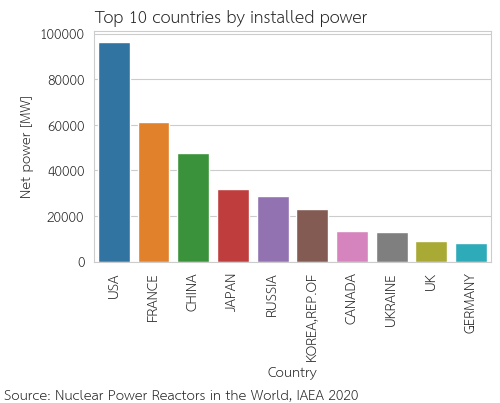

In [111]:
fig, ax = plt.subplots(figsize=(5,4))

sns.barplot(x='Country', y='Net', data=top10, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel('Net power [MW]')
ax.set_title('Top 10 countries by installed power', loc='left')
plt.tight_layout()

ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points',)
plt.show()

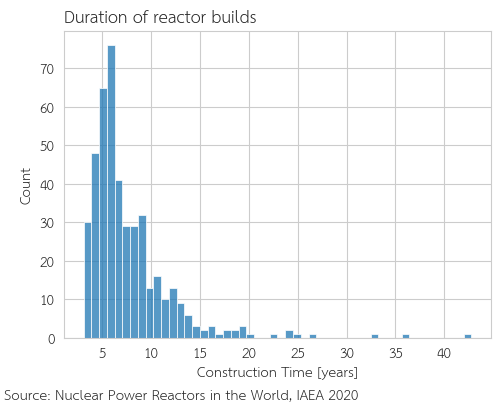

In [113]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(df['Construction_time']/365, bins=50, ax=ax, kde=False)
ax.set_xlabel('Construction Time [years]')
ax.set_title('Duration of reactor builds', loc='left')
plt.tight_layout()

ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points',)
plt.show()